### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('coupons.csv')

In [40]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


/Users/benjaminbond/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


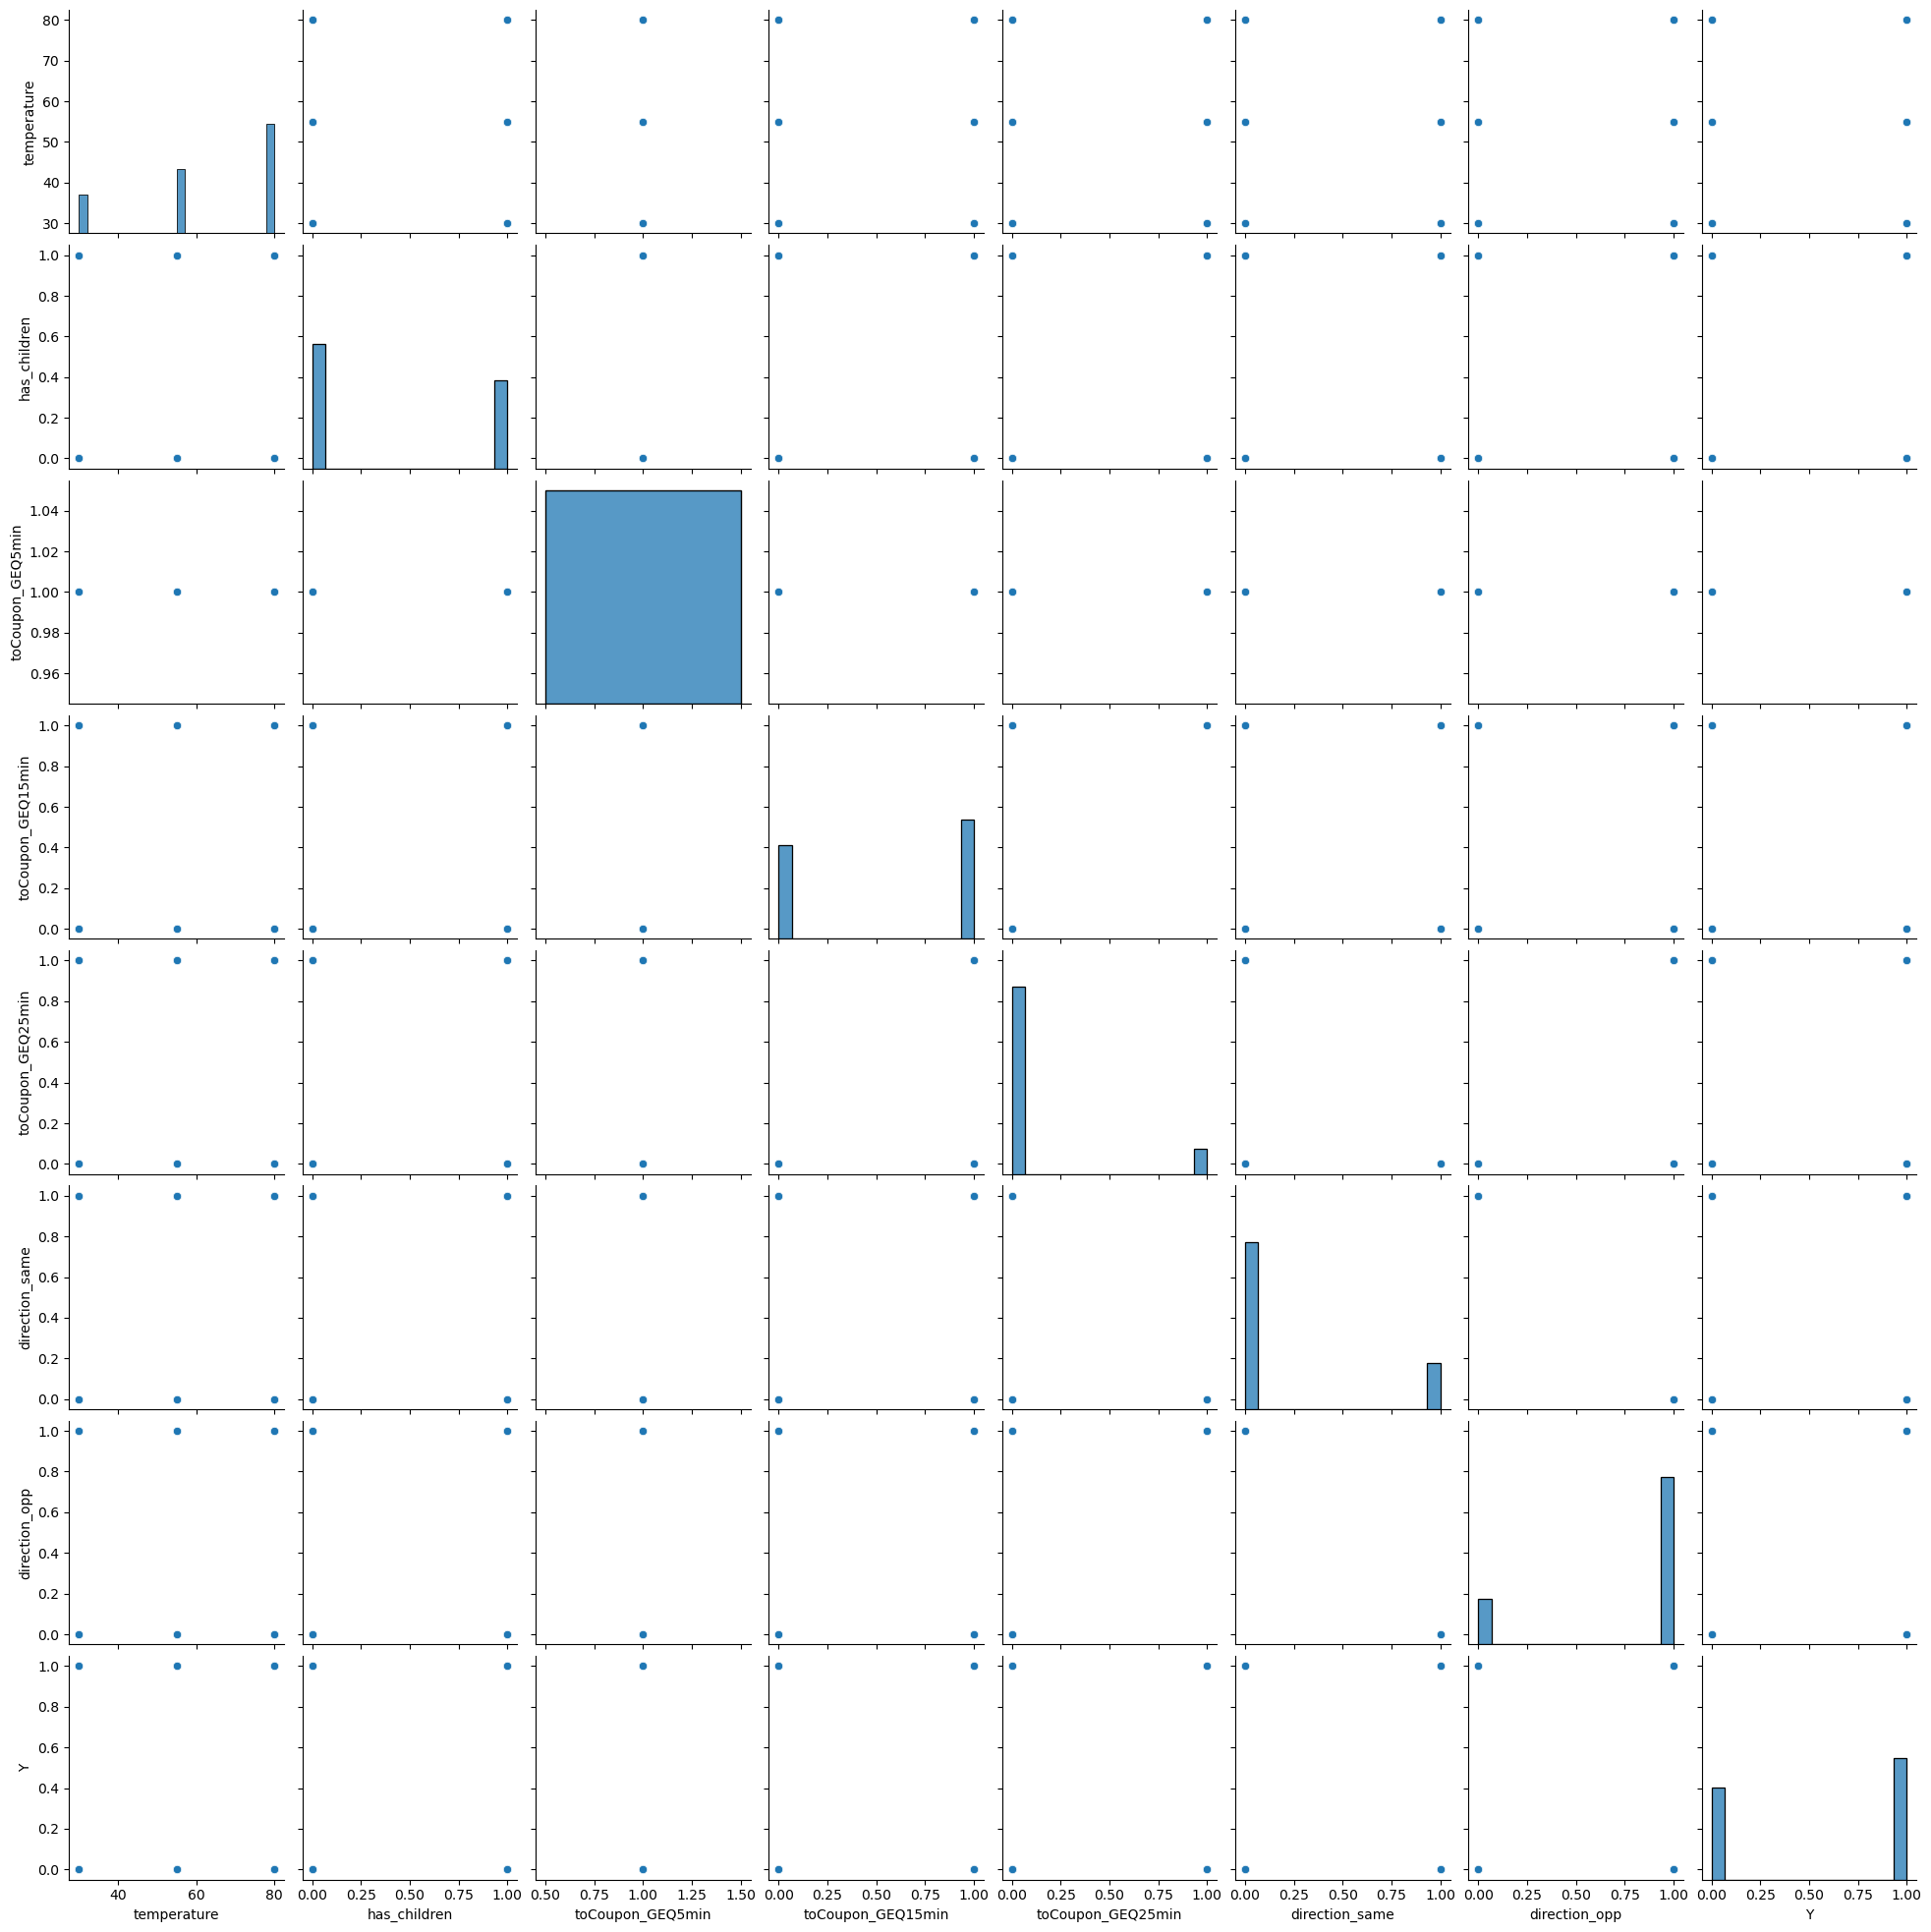

In [51]:
#ran a pairplot to visualize the integer data in an easy manner
sns.pairplot(data)

The above pariplot clearly shows the majority of the integer level data is bianry or categorical in nature. This is examplified as 1s and 0s or discrete values.

2. Investigate the dataset for missing or problematic data.

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

<Axes: title={'center': 'Missing data'}>

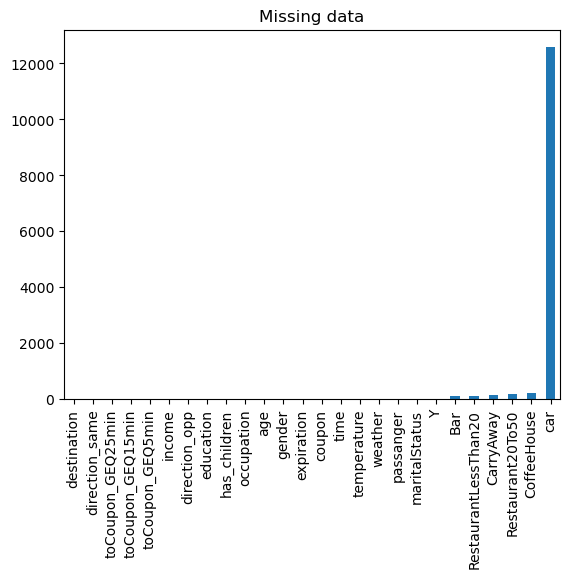

In [109]:
data.isnull().sum().sort_values().plot(kind='bar',title='Missing data')

Based on the output of the plot above, I have decided to replace missing values in five columns ('bar', 'Coffeehouse', 'CarryAway','RestaurantLessThan20','Restaurant20to50') with 'NoValue'. 
For the attribute 'car', I will remove the entire column from the dataframe because so much data is missing.

In [117]:
#drop column 'car' from the dataframe
data.drop(columns = ['car'], axis=1, inplace=True)

<Axes: title={'center': 'Missing data'}>

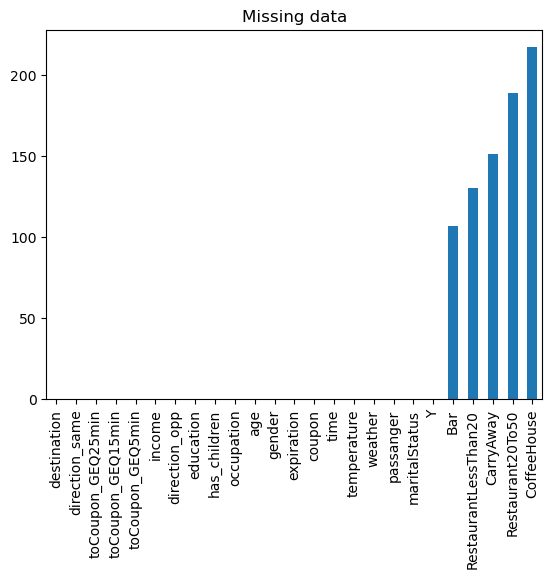

In [121]:
#validate 'car' data has been removed from the dataframe
data.isnull().sum().sort_values().plot(kind='bar',title='Missing data')

Removing the missing values in the car attribute (an outlier), allows us to more clearly see the amount of missing data in other attributes. Bar, RestaurantLessThen20, CarryAway, Restaurant20To50 and CoffeeHouse all have much smaller amounts of missing data. 
For the purposes of this assignment, I did not impute missing values using a mean() methodology. I simpily changed the NaN value to 'NoValue'.

In [125]:
data.fillna('NoValue',inplace=True)

<Axes: title={'center': 'Missing data'}>

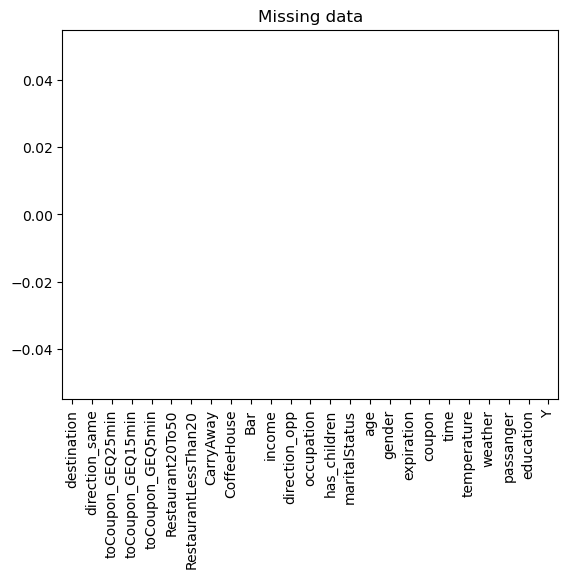

In [126]:
#validate missing values have been removed from the dataframe
data.isnull().sum().sort_values().plot(kind='bar',title='Missing data')

4. What proportion of the total observations chose to accept the coupon? 



In [219]:
#need to find the number of redeemed coupons and divide by the total number of coupons issued.
percent = ((data['Y'].value_counts()[1])/len(data.index))
print("Total obs accepting coupons: {:,.1%}".format(percent))

Total obs accepting coupons: 56.8%


5. Use a bar plot to visualize the `coupon` column.

In [ ]:
The plot below displays coupon issuance by coupon type. 
Coffee House coupon issuance was near 4000 on the high side while Restaurant(20-50) coupon type 
was issued the least at 1500.

<Axes: title={'center': 'Coupons Issued_by Estblishment Type'}, xlabel='Coupon Type', ylabel='Coupon Count'>

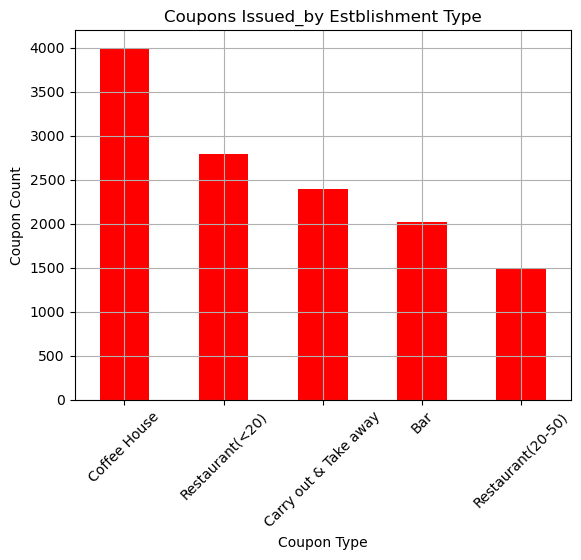

In [241]:
#total number of coupons issued by type
data['coupon'].value_counts().plot(kind = 'bar', title="Coupons Issued_by Estblishment Type", grid=True, 
                                    ylabel="Coupon Count", xlabel="Coupon Type", color="Red", rot=45)

**Creating a stacked bar by Coupon Type and action (redeptions or not)

In [344]:
#creating new variables by selecting specific events into temporary dataframes
df1a = (data[data['Y']==1]).rename(columns = {"Y":"CouponR_Yes"})
df1b = (data[data['Y']==0]).rename(columns = {"Y":"CouponR_No"})

In [332]:
#merging temp df1 to master df
data1 = pd.merge(left=data[['coupon','Y']], right=df1a[['CouponR_Yes']], left_index=True, right_index=True, how="left")

In [334]:
#merging temp df2 to master df
data1a = pd.merge(left=data1, right=df1b[['CouponR_No']], left_index=True, right_index=True, how="left")

<Axes: xlabel='Coupon Type', ylabel='Coupon Count'>

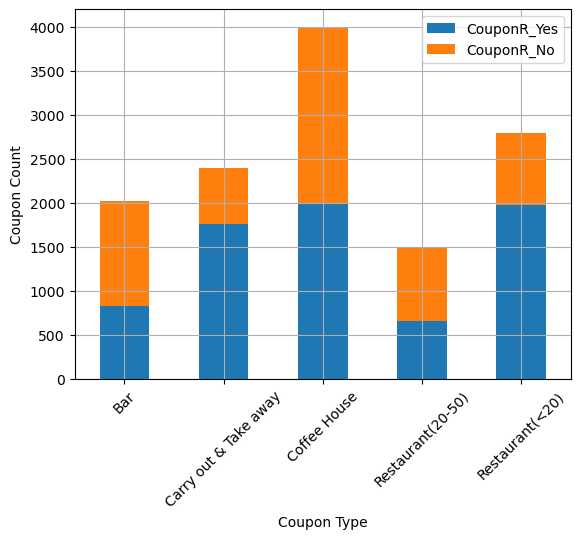

In [361]:
data1b.plot(kind='bar', stacked=True, ylabel="Coupon Count", xlabel="Coupon Type", rot=45, grid=True)

The output above shows that coupon redemption depended on the type of coupon it was. 
Bar coupons: of the approximately 2,000 issued roughtly 800 were redeemed
Coffee House coupons: 4,000 were issued and half were redeemed
Carry Out and Restaurant(<20): both realized the highest redemption rates of all coupon types

6. Use a histogram to visualize the temperature column.

**The below plot visualized temperatures when coupons were issued

<Axes: title={'center': 'Coupon Issuance_by Temperature Bins'}, xlabel='Temperature', ylabel='Coupon Count'>

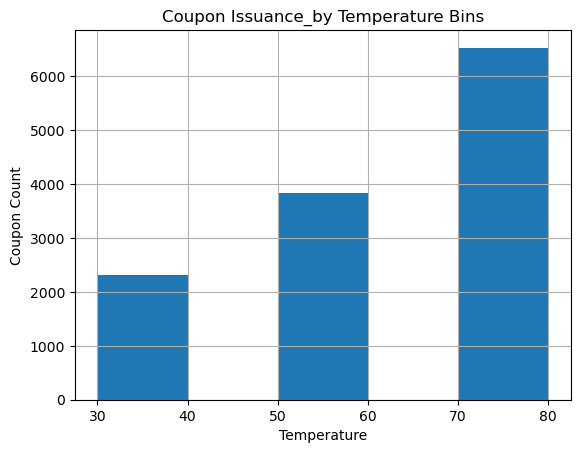

In [7]:
data['temperature'].plot(kind = 'hist', title="Coupon Issuance_by Temperature Bins", grid=True, bins=5, ylabel="Coupon Count", xlabel="Temperature")

In [ ]:
The below plot visualized temperatures when coupons were redeemed.
As we can see, directionally redemption matches issuance by temperature bins.

<Axes: title={'center': 'Coupon Utilization_Redemption by Temperature'}, xlabel='Temperature', ylabel='Coupon Count'>

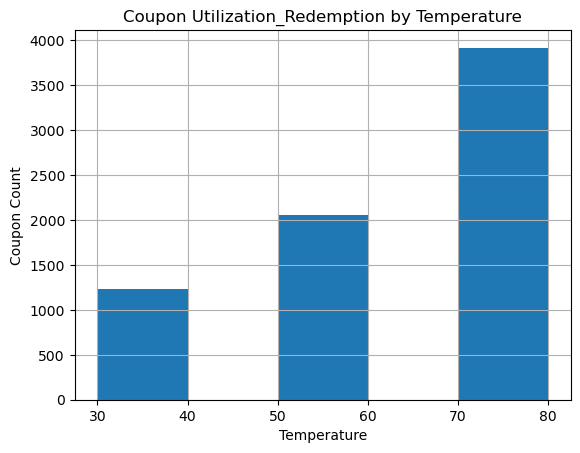

In [363]:
#using the dataframes from the stacked bar plot, the following histogram was made vizualizing coupon redemption displaying temperature bins
df1a['temperature'].plot(kind = 'hist', title="Coupon Utilization_Redemption by Temperature Bins", grid=True, bins=5, ylabel="Coupon Count", xlabel="Temperature")

In [ ]:
The below plot visualized temperatures when coupons were not redeemed.
Again, we can see directionality between issuance and not redeemed by temperature bins.

<Axes: title={'center': 'Coupon Utilization_Not Redeemed by Temperature Bins'}, xlabel='Temperature', ylabel='Coupon Count'>

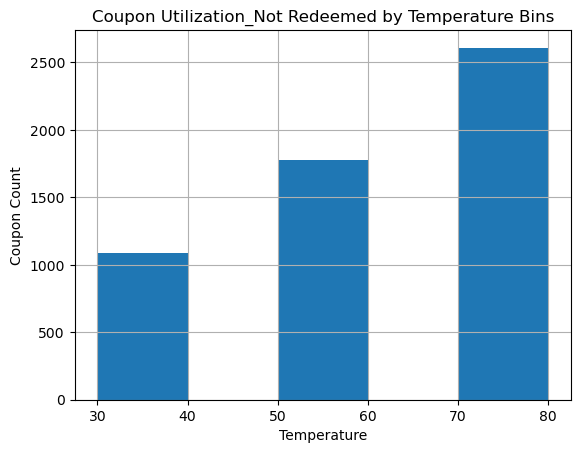

In [365]:
#using the dataframes from the stacked bar plot, the following histogram was made vizualizing coupons not redeemed displaying temperature bins
df1b['temperature'].plot(kind = 'hist', title="Coupon Utilization_Not Redeemed by Temperature Bins", grid=True, bins=5, ylabel="Coupon Count", xlabel="Temperature")

As an analyst of this dataset, I'd have to look at all three of the previous bar plots to determine how weather affected redemption.
For example, in the 'Coupon Issuance_by Temperature Bins' plot, we see nearly 6,500 coupons were issued when the temperature was in the bin 70-80. The plot 'Coupon Utilization_Redemption by Temperature Bins' show just under 4,000 coupons were redeemed in the bin 70-80, while the 'Coupon Utilization_Not Redeemed by Temperature Bins' show the remaining not redeemed issued coupons.
All three of these plots could have been displayed on a single stack bar plot similar to the one used to show coupon utilization by type.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [368]:
#create new dataframe with bar data only
dfbar = (data[data['coupon']=='Bar'])

2. What proportion of bar coupons were accepted?


In [371]:
#need to find the number of redeemed coupons and divide by the total number of coupons issued for this population.
percent = ((dfbar['Y'].value_counts()[1])/len(dfbar.index))
print("Total obs accepting coupons: {:,.1%}".format(percent))

Total obs accepting coupons: 41.0%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


To answer this question, we need to know the bins for responses of bar visitorship.
In this case, 'never','less1','1~3' fall into 3 or fewer times a month. '4~8' and 'gt8' are the outside of the requirement.

In [478]:
#create dataframe for 3 or fewer bar visits
dfbar_3few = dfbar[dfbar['Bar'].isin(['never','less1','1~3'])]

In [556]:
#calculate the percent of redeemed
percent_redeemed = dfbar_3few['Y'].value_counts(normalize=True).get(1, 0) * 100

#calculate the percent of not redeemed
percent_not_redeemed = 100 - percent_redeemed
print("Total observations of Bar visitors (3 or Fewer visits/month) accepting coupons: {:.1f}%".format(percent_redeemed))
print("Total observations of Bar visitors (3 or Fewer visits/month) not accepting coupons: {:.1f}%".format(percent_not_redeemed))

#calculate var between not accepting vs accepting
variance_percent = (percent_not_redeemed - percent_redeemed) / percent_redeemed
print("Variance between not accepting and accepting the coupon by Bar visitors (3 or Fewer visits/month): {:.1%}".format(variance_percent))


Total observations of Bar visitors (3 or Fewer visits/month) accepting coupons: 37.1%
Total observations of Bar visitors (3 or Fewer visits/month) not accepting coupons: 62.9%
Variance between not accepting and accepting the coupon by Bar visitors (3 or Fewer visits/month): 69.8%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [502]:
#create dataframe for 3 or more bar visits
dfbar_ageplus = dfbar[dfbar['Bar'].isin(['1~3', '4~8', 'gt8']) & (dfbar['age'].isin(['26','31','36','41','46','50plus']))]

In [507]:
#create dataframe for one or fewer bar visits
dfbar_agelow = dfbar[dfbar['Bar'].isin(['less1', 'never']) & (dfbar['age'].isin(['below21','21']))]

In [557]:
#calculate the percent of redeemed - high bar visitation and higher age
percentB = ((dfbar_ageplus['Y'].value_counts()[1])/len(dfbar.index))
print("Total observations accepting coupons (high bar visitation and age 25+): {:.1%}".format(percentB))

#calculate the percent of redeemed - low bar visitation and lower age
percentC = ((dfbar_agelow['Y'].value_counts()[1])/len(dfbar.index))
print("Total observations accepting coupons (low bar visitation and age <25): {:.1%}".format(percentC))

#calculate var between high and low bar visitation
Var_percent = (percentB - percentC)/percentC
print("Variance between the low bar visitation group and high bar visitation group: {:.1%}".format(Var_percent))


Total observations accepting coupons (high bar visitation and age 25+): 14.5%
Total observations accepting coupons (low bar visitation and age <25): 6.4%
Variance between the high bar visitation group and low bar visitation group: 126.4%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [528]:
#drivers who go to bars >1/month
dfbar_pass = dfbar[dfbar['Bar'].isin(['1~3', '4~8', 'gt8']) & (dfbar['passanger'].isin(['Friend(s)','Partner']))]

In [529]:
#drivers who go to bars >1/month
dfbar_occ = dfbar[dfbar['Bar'].isin(['1~3', '4~8', 'gt8']) & (~dfbar['occupation'].isin(['Farming Fishing & Forestry']))]

In [558]:
#calculate the percent of redeemed - high bar visitation and no kid passenger
percent_pass = ((dfbar_pass['Y'].value_counts()[1])/len(dfbar.index))
print("Total observations accepting coupons (high bar visitation and no kid passenger): {:.1%}".format(percent_pass))

#calculate the percent of redeemed - high bar visitation and not in farming, fishing or forestry
percent_occ = ((dfbar_occ['Y'].value_counts()[1])/len(dfbar.index))
print("Total observations accepting coupons (high bar visitation and not in farming, fishing or forestry): {:.1%}".format(percent_occ))

#calculate var between high and no kid passengers and not in farming, fishing or forestry
Var_percent = (percent_pass - percent_occ)/percent_occ
print("Variance between accepting the coupon by Bar visitation no kid passengers and not in farming, fishing or forestry: {:.1%}".format(Var_percent))


Total observations accepting coupons (high bar visitation and no kid passenger): 6.9%
Total observations accepting coupons (high bar visitation and not in farming, fishing or forestry): 20.3%
Variance between accepting the coupon by Bar visitation no kid passengers and not in farming, fishing or forestry: -65.9%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [547]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed
dfbar_6a = dfbar[dfbar['Bar'].isin(['1~3', '4~8', 'gt8']) & (dfbar['passanger'].isin(['Friend(s)','Partner'])) & (~dfbar['maritalStatus'].isin(['Widowed']))]

In [548]:
#go to bars more than once a month and are under the age of 30
dfbar_6b = dfbar[dfbar['Bar'].isin(['1~3', '4~8', 'gt8']) & (dfbar['age'].isin(['below21','21','26']))]

In [549]:
#go to cheap restaurants more than 4 times a month and income is less than 50K
dfbar_6c = dfbar[dfbar['RestaurantLessThan20'].isin(['4~8', 'gt8']) & (dfbar['income'].isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']))]

In [555]:
#calculate the percent of redeemed - high bar visitation and no kid passenger and not widowed
percent_6a = ((dfbar_6a['Y'].value_counts()[1])/len(dfbar.index))
print("Total observations accepting coupons (high bar visitation and no kid passenger and not widowed): {:.1%}".format(percent_6a))
#calculate the percent of redeemed - high bar visitation and are under the age of 30
percent_6b = ((dfbar_6b['Y'].value_counts()[1])/len(dfbar.index))
print("Total observations accepting coupons (high bar visitation and age <30): {:.1%}".format(percent_6b))
#calculate the percent of redeemed - cheap restaurants 4+/month and income <50K
percent_6c = ((dfbar_6c['Y'].value_counts()[1])/len(dfbar.index))
print("Total observations accepting coupons (cheap restaurants 4+/month and income <50K): {:.1%}".format(percent_6c))


Total observations accepting coupons (high bar visitation and no kid passenger and not widowed): 6.9%
Total observations accepting coupons (high bar visitation and age <30): 12.3%
Total observations accepting coupons (cheap restaurants 4+/month and income <50K): 7.7%


Comparing the three requested cohort reveals similar trends: individuals that frequent bar more than once/month and skew younger redeem coupons.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on outputs from the above precesses, I would hypothesize:
1. Those redeemeing coupons with the attributes of high bar visitation (>1/month) and younger age like to be out and are more carefree with spending
2. Coupon redeemers will only redeem coupons when conveniently around the issuing establishment, this was displayed by high redemption rates with holding for those with occupations of 'farming, fishing or forestry'
3. Having a passenger in the car reduces redemption rate

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

The investigation I want to conduct is into education level and coupon redemption

Text(0.5, 1.0, 'Coupon Redemption by Education Attainment')

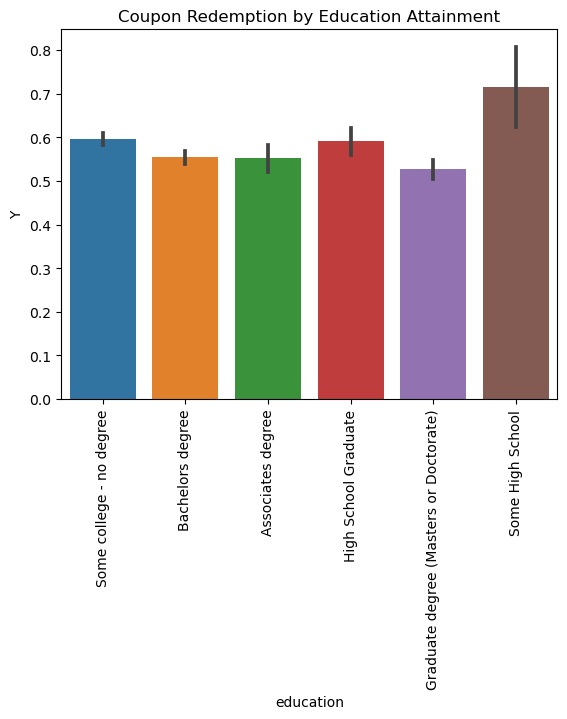

In [9]:
#visualization of coupon redemptions by educational attainment of full dataframe
sns.barplot(data = data, x='education', y='Y')
plt.xticks(rotation = 90)
plt.title('Coupon Redemption by Education Attainment')

The above bar plot shows coupon redemption by educational attainment. The Y axis represents the percent redemption of coupons by those educational categories. But, the reader of the plot needs to understand what is being presented. For example, the category 'some high School' has the highest redemption rate at over 70%, but the total number of redeemed coupons by that group is the lowest of all categories with just 63. Compare that to 'Some college - no degree' with a 10% lower redemption rate, but 2,595 coupons redeemed. As a business decision, the issuer of the coupon should target the best audience to generate business. In this case the 'Some college' category should be your target audience becuase of its overall size and high coupon utilization. 

Text(0.5, 1.0, 'Coupon Utilization by Education Attainment')

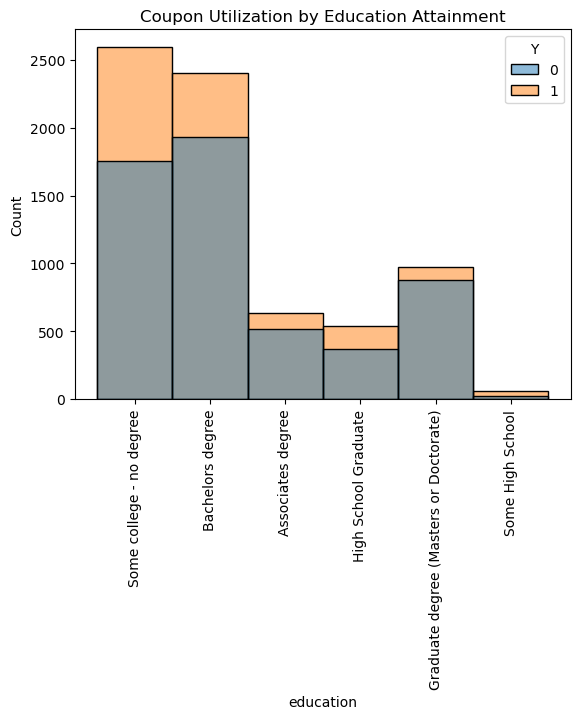

In [10]:
#histogram visualizing coupon utilization (redeemed or not) by educational attainment
sns.histplot(data = data, x='education', hue='Y')
plt.xticks(rotation = 90)
plt.title('Coupon Utilization by Education Attainment')

Similar to the plot titled 'Coupon Redemption by Education Attainment', the above plot shows categories of educational attainment and coupon utilization in aggergate values. This allows the reader to clearly see what was described in the previous markdown; that 'Some high School' is not a good target audience because of its compartive size to 'Some college'.

In [594]:
#creating groupby dataframe using sum function
data_edu1 = data.groupby('education').sum('Y')
head_edu = pd.DataFrame(data_edu1).reset_index()

In [597]:
head_edu.reset_index(inplace=True, drop=True)

In [598]:
data_edu.head(10)

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
education,,,,,,,,
Associates degree,70640,674,1153,674,146,238,915,638
Bachelors degree,274075,1593,4335,2436,517,917,3418,2403
Graduate degree (Masters or Doctorate),119085,1019,1852,1081,227,413,1439,975
High School Graduate,57625,221,905,491,117,215,690,536
Some High School,5365,66,88,45,11,24,64,63
Some college - no degree,276130,1680,4351,2395,493,917,3434,2595


In [637]:
#calculating the percent repesentation of education attainment in the complete population
data_edu_cnt = data1a_edu['education'].value_counts(normalize=True) * 100
print(data_edu_cnt.round(1))

education
Some college - no degree                  34.3
Bachelors degree                          34.2
Graduate degree (Masters or Doctorate)    14.6
Associates degree                          9.1
High School Graduate                       7.1
Some High School                           0.7
Name: proportion, dtype: float64


In [666]:
#create dataframe for pie chart
data_edu_pie = {'education': ['Some college - no degree', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)', 'Associates degree','High School Graduate','Some High School'],
        'edu_attain': [34.3, 34.2, 14.6, 9.1, 7.1, 0.7]}
data_edu_pie1 = pd.DataFrame(data_edu_pie)

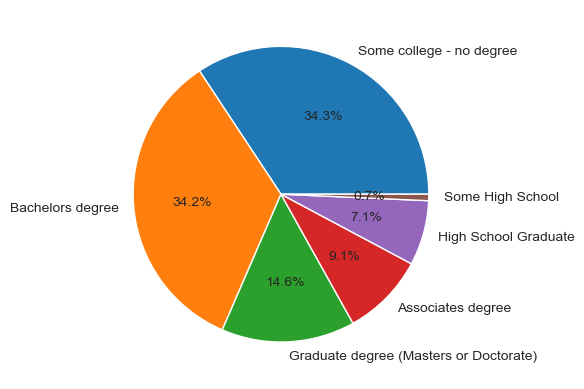

<Figure size 800x800 with 0 Axes>

In [675]:
#pie chart visualization of educational attainment of the complete population
plt.pie(data_edu_pie1['edu_attain'], labels=data_edu_pie1['education'], autopct='%1.1f%%')
plt.figure(figsize=(8,8))
plt.show()

The above pie plot further conveys the story about the 'Some High School' category. As a percent of the total population, this group comprises less than 1% of total. This explains why so few coupons were issued to this group and why so few were redeemed.

Below are calculations of coupon utilization by educational attainment

In [643]:
#create dataframe for Some college - no degree
data1a_edu_SomeC = data1a_edu[data1a_edu['education'].isin(['Some college - no degree'])]
#print Some college - no degree
data1a_edu_SomeC2 = ((data1a_edu_SomeC['Y'].value_counts()[1])/len(data1a_edu_SomeC.index))
print("Total observations accepting coupons ('Some college - no degree'): {:.1%}".format(data1a_edu_SomeC2))

#create dataframe for Bachelors degree
data1a_edu_SomeC = data1a_edu[data1a_edu['education'].isin(['Bachelors degree'])]
#print Bachelors degree
data1a_edu_SomeC2 = ((data1a_edu_SomeC['Y'].value_counts()[1])/len(data1a_edu_SomeC.index))
print("Total observations accepting coupons ('Bachelors degree'): {:.1%}".format(data1a_edu_SomeC2))

#create dataframe for Graduate degree (Masters or Doctorate)
data1a_edu_SomeC = data1a_edu[data1a_edu['education'].isin(['Graduate degree (Masters or Doctorate)'])]
#print Graduate degree (Masters or Doctorate)
data1a_edu_SomeC2 = ((data1a_edu_SomeC['Y'].value_counts()[1])/len(data1a_edu_SomeC.index))
print("Total observations accepting coupons ('Graduate degree (Masters or Doctorate)'): {:.1%}".format(data1a_edu_SomeC2))

#create dataframe for Associates degree
data1a_edu_SomeC = data1a_edu[data1a_edu['education'].isin(['Associates degree'])]
#print Associates degree
data1a_edu_SomeC2 = ((data1a_edu_SomeC['Y'].value_counts()[1])/len(data1a_edu_SomeC.index))
print("Total observations accepting coupons ('Associates degree'): {:.1%}".format(data1a_edu_SomeC2))

#create dataframe for High School Graduate
data1a_edu_SomeC = data1a_edu[data1a_edu['education'].isin(['High School Graduate'])]
#print High School Graduate
data1a_edu_SomeC2 = ((data1a_edu_SomeC['Y'].value_counts()[1])/len(data1a_edu_SomeC.index))
print("Total observations accepting coupons ('High School Graduate'): {:.1%}".format(data1a_edu_SomeC2))

#create dataframe for Some High School
data1a_edu_SomeC = data1a_edu[data1a_edu['education'].isin(['Some High School'])]
#print Some High School
data1a_edu_SomeC2 = ((data1a_edu_SomeC['Y'].value_counts()[1])/len(data1a_edu_SomeC.index))
print("Total observations accepting coupons ('Some High School'): {:.1%}".format(data1a_edu_SomeC2))


Total observations accepting coupons ('Some college - no degree'): 59.6%
Total observations accepting coupons ('Bachelors degree'): 55.4%
Total observations accepting coupons ('Graduate degree (Masters or Doctorate)'): 52.6%
Total observations accepting coupons ('Associates degree'): 55.3%
Total observations accepting coupons ('High School Graduate'): 59.2%
Total observations accepting coupons ('Some High School'): 71.6%


In [676]:
#create dataframe for comparision
data_edu_redmp = {'education': ['Some college - no degree', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)', 'Associates degree','High School Graduate','Some High School'],
        'edu_attain': [34.3, 34.2, 14.6, 9.1, 7.1, 0.7],
        'coupon_utilization': [59.6, 55.4, 52.6, 55.3, 59.2, 71.6]}
data_edu_redmp1 = pd.DataFrame(data_edu_redmp)
data_edu_redmp1.head(10)

,education,edu_attain,coupon_utilization
0,Some college - no degree,34.3,59.6
1,Bachelors degree,34.2,55.4
2,Graduate degree (Masters or Doctorate),14.6,52.6
3,Associates degree,9.1,55.3
4,High School Graduate,7.1,59.2
5,Some High School,0.7,71.6
